[[10]
 [10]
 [ 0]
 ...
 [ 4]
 [ 8]
 [ 2]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_66 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 3, 3, 256)         0         
_____________________________________________________

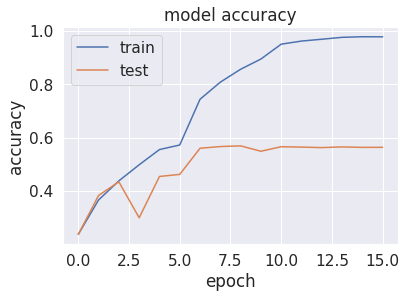

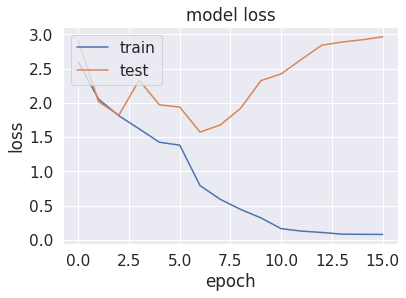

Confusion Matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(10000, 20)
(10000, 20)
[[372  31   0   1   0   6   6   2   5   7   0  13   4   2   7   2  34   0
    3   5]
 [179 235  12   5   8   3   6   1   0   4   1   3   3   5   8   6  12   0
    4   5]
 [ 69   9 353   7  25   1   4  11   0   0   0   0   0  10   7   0   0   0
    2   2]
 [107   1   6 246  19  47  21   4   3   5   0   0   1   7  20   0   5   0
    4   4]
 [100   2  45   9 300   5   4   7   3   2   0   5   0   1  10   0   6   0
    0   1]
 [117  10   7  23   2 264  34   2   0   5   4   1   0   2  16   1   1   1
    3   7]
 [ 94   5   1  11  10  28 312   1   1   6   1   1   0   5  10   0   5   0
    3   6]
 [150   8  16   3  11   3   4 232   3   0   0   5   4  29  10   6   9   1
    1   5]
 [233   2   0   3   4   5   2   6 123   5   1  44   8   4  14   4  38   0
    2   2]
 [ 81   2   0   1   0   6  11   0   0 

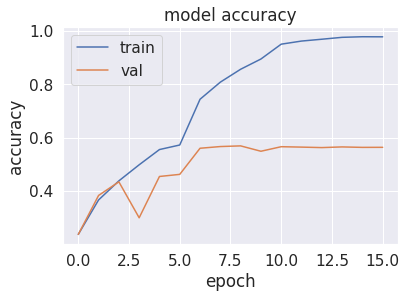

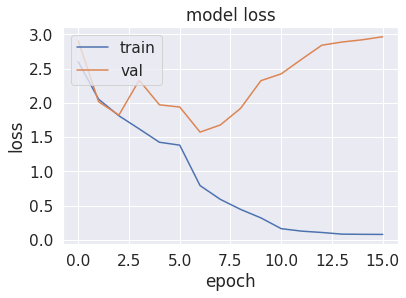

Normalized confusion matrix
[[0.744 0.062 0.    0.002 0.    0.012 0.012 0.004 0.01  0.014 0.    0.026
  0.008 0.004 0.014 0.004 0.068 0.    0.006 0.01 ]
 [0.358 0.47  0.024 0.01  0.016 0.006 0.012 0.002 0.    0.008 0.002 0.006
  0.006 0.01  0.016 0.012 0.024 0.    0.008 0.01 ]
 [0.138 0.018 0.706 0.014 0.05  0.002 0.008 0.022 0.    0.    0.    0.
  0.    0.02  0.014 0.    0.    0.    0.004 0.004]
 [0.214 0.002 0.012 0.492 0.038 0.094 0.042 0.008 0.006 0.01  0.    0.
  0.002 0.014 0.04  0.    0.01  0.    0.008 0.008]
 [0.2   0.004 0.09  0.018 0.6   0.01  0.008 0.014 0.006 0.004 0.    0.01
  0.    0.002 0.02  0.    0.012 0.    0.    0.002]
 [0.234 0.02  0.014 0.046 0.004 0.528 0.068 0.004 0.    0.01  0.008 0.002
  0.    0.004 0.032 0.002 0.002 0.002 0.006 0.014]
 [0.188 0.01  0.002 0.022 0.02  0.056 0.624 0.002 0.002 0.012 0.002 0.002
  0.    0.01  0.02  0.    0.01  0.    0.006 0.012]
 [0.3   0.016 0.032 0.006 0.022 0.006 0.008 0.464 0.006 0.    0.    0.01
  0.008 0.058 0.02  0.012 0.018

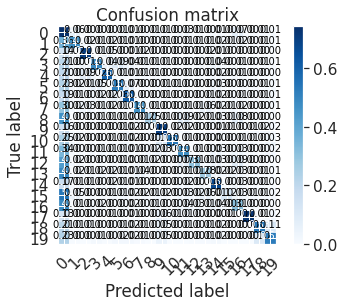

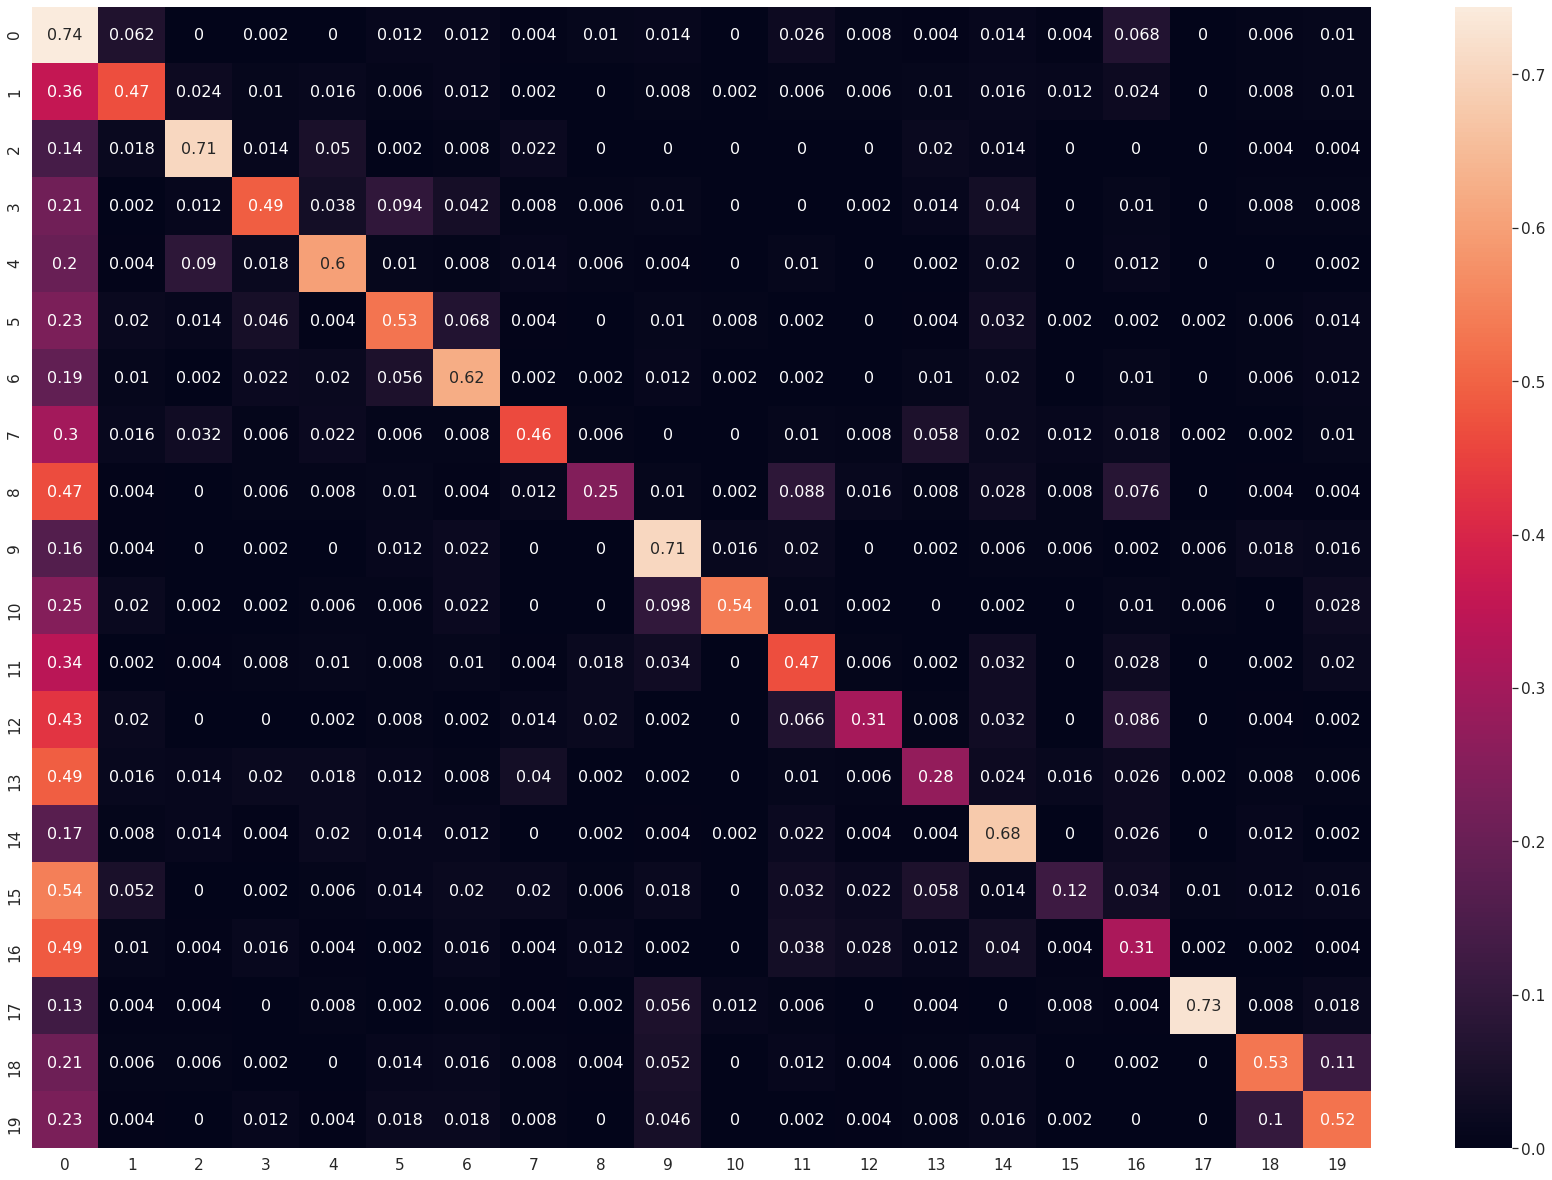

ValueError: ignored

In [ ]:
import numpy as np 
import pandas as pd 

import os


import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.layers import Layer
from keras import backend as K
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout, ZeroPadding2D
from keras import Model
from keras.layers import Input
from keras.regularizers import l2

from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix


import seaborn as sn
import pandas as pd

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


# Hyperparameters
batch_size = 128
num_classes = 20
epochs = 100

# Load CIFAR100 Data - only 20 superclasses
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

print(y_test)
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_test)

# AlexNet Model
model = Sequential()

model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
#Callbacks
checkpoint = ModelCheckpoint('AlexNet_CIFAR100.h5',
                            monitor='val_accuracy',
                            mode='max',
                            save_best_only=True,
                            verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=9,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

# Train the Model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=callbacks,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = model.predict(x_test)

#Print results
print('Confusion Matrix')
print(y_test)

y_pred = (y_pred > 0.5)
print(y_pred.shape)
print(y_test.shape)
    

con_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(con_matrix)
print(con_matrix.shape)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sn
import pandas as pd

categories = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 
          'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things',
          'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 
          'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)




  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plot_confusion_matrix(cm, list(range(20)))

cf_matrix = cm
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cf_matrix_norm = cm
df_cm = pd.DataFrame(cm, range(20), range(20))
plt.figure(figsize=(30,21))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


labels = ['True Neg','False Pos','False Neg','True Pos']
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

make_confusion_matrix(cf_matrix_norm, 
                      group_names=labels,
                      categories=categories,
                      figsize=(30,21))
